In [1]:
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [7]:
class GradBoostingReg:
    def __init__(self, n_trees=1000, lr=0.1, metric=mean_squared_error):
        self.lr = lr
        self.n_trees = n_trees
        self.trees = []
        self.errors = []
        self.metric = metric
    
    def fit(self, X, y):
        y_pred = np.array([y.mean() for _ in range(X.shape[0])])
        
        for _ in range(self.n_trees):
            residual = y - y_pred

            tree = DecisionTreeRegressor(max_depth=1)
            tree.fit(X, residual)

            y_pred += self.lr * tree.predict(X)
            self.trees.append(tree)
            
            error = self.metric(y, y_pred)
            self.errors.append(error)
    
    def visualize_learning(self):
        x_axis = range(1, self.n_trees + 1)
        y_axis = self.errors

        plt.scatter(x_axis, y_axis)
        plt.show()

In [3]:
x, y_true = make_regression(n_samples=100, n_features=7)

In [8]:
model = GradBoostingReg()

model.fit(x, y_true)

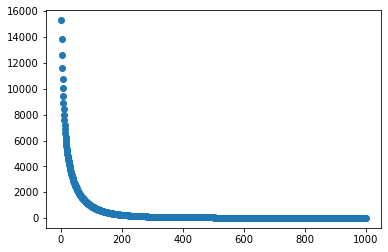

In [9]:
model.visualize_learning()